In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
#Parameters

nr = 2001
nt = 4000
cfl=0.5
r_wt = 51.8
r_bdry = 1.8
mass = 1.e0
ell = 4
amplitude = 1.e-4
r_0 = 3.
sigma = 0.5
r_in = 2.0
r_out = 49.8

In [3]:
# Grid and dt

dr = (r_wt-r_bdry)/np.float(nr-1)
drinv=1./dr

r=np.zeros(nr)
rh=np.zeros(nr)
for i in range (nr):
    r[i]  = r_wt - np.float(i) * dr
    rh[i] = r_wt - (np.float(i) + 0.5) * dr
dt = cfl * dr

In [4]:
#Zeroing fields

bns = np.zeros(nr)
bos = np.zeros(nr) 
wns = np.zeros(nr)
wos = np.zeros(nr)
gns = np.zeros(nr)
gos = np.zeros(nr)

rphi = np.zeros((nt,nr))
vtime=np.zeros(nt)
gscri=np.zeros(nt)

In [5]:
#Initial data and fixed metric

for i in range(nr):
    gns[i]=amplitude*np.exp(-(r[i]-r_0)**2./sigma**2.)
    bns[i]=0.
    wns[i]=-2.*mass/r[i]**2.

In [6]:
#Evolution
time = 0.
for it in range(nt):
    vtime[it]=time
    for i in range(nr):
        rphi[it][i]=gns[i]
        if i==nr-1: gscri[it]=gns[i]
    time = time + dt
    gos = np.copy(gns)
    bos = np.copy(bns)
    wos = np.copy(wns)
    for i in range(nr):
        if i==0:
            Wi=wos[i]
            deli=0.5*(1.+r[i]*Wi)*dt
            """ Value of g at the point S; the incoming geodesic hits the lower level """
            gs=gos[i]+(gos[i+1]-gos[i])/dr*deli
            gns[i]=gs
        if i==1:
            Wim=wns[i-1]
            Wi=0.5*(wos[i+1]+wns[i-1])
            delim  = 0.5 * (1. + r[i-1] * Wim) * dt
            deli   = 0.5 * (1. + r[i]   * Wi ) * dt
            rp = r[i-1]
            rq = r[i]
            rr = r[i-1] + delim
            rs = r[i]   + deli
            rc = 0.5 * (rp + rs)
            # Values of g at the corners of the characteristic parallelogram
            gp = gns[i-1]
            gr = gos[i-1] + (gos[i]   - gos[i-1]) / dr * delim
            gs = gos[i]   + (gos[i+1] - gos[i]  ) / dr * deli
            W = 0.5 * (wns[i-1] + wos[i] )
            g = 0.5 * (gns[i-1] + gos[i])
            dr_W = -(wos[i] - wos[i-1]) * drinv
            H_c = (W + rc * dr_W) * g / rc  + ell * (ell + 1) * g / rc**2.
            RHS = 0.25 *  dt * (rq - rp + rs - rr) * H_c
            gns[i]=gp + gs - gr + RHS
        if i > 1 and i < nr-1:
            Wim    = 0.5 * (wos[i]   + wns[i-2])
            Wi     = 0.5 * (wos[i+1] + wns[i-1])
            delim  = 0.5 * (1. + r[i-1] * Wim) * dt
            deli   = 0.5 * (1. + r[i]   * Wi ) * dt
            rp = r[i-1] - 0.5 * delim
            rr = r[i-1] + 0.5 * delim
            rq = r[i]   - 0.5 * deli
            rs = r[i]   + 0.5 * deli
            rc = 0.5 * (rp + rs)
            # Values of g at the corners of the characteristic parallelogram
            gp = gns[i-1] - (gns[i-1] - gns[i-2]) / dr * 0.5 * delim
            gr = gos[i-1] + (gos[i]   - gos[i-1]) / dr * 0.5 * delim
            gs = gos[i]   + (gos[i+1] - gos[i]  ) / dr * 0.5 * deli
            W = 0.5 * (wns[i-1] + wos[i] )
            g = 0.5 * (gns[i-1] + gos[i])
            dr_W = -0.5 * (wns[i-1] - wns[i-2] + wos[i+1] - wos[i]) * drinv
            H_c = (W + rc * dr_W) * g /rc  + np.float(ell * (ell + 1)) * g / rc**2.
            RHS = 0.25 *  dt * (rq - rp + rs - rr) * H_c
            gns[i] = (- gns[i-1] * (0.5 * deli / dr) \
                   + gp + gs - gr + RHS)               \
                   / (1. - (0.5 * deli / dr))
        if i==nr-1:
            gns[i]=gns[i-1]

<IPython.core.display.Javascript object>


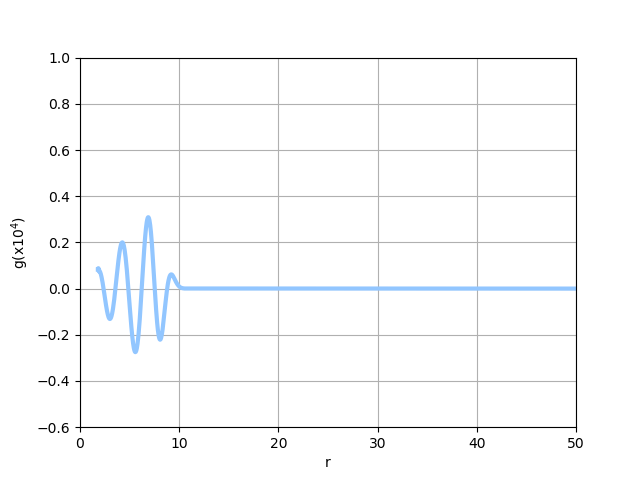

In [7]:
#Visualization and animation


max_idx = len(rphi)
plt.style.use('seaborn-pastel')
fig=plt.figure()
ax=plt.axes(xlim=(0.,50.),ylim=(-6.e-1,1.))
plt.xlabel('r')
plt.ylabel('g(x10$^4$)')
plt.grid()
line, = ax.plot([],[], lw=3)

def init():
    line.set_data([],[])
    return line,

def animate(i):
   x_axis=r[:]
   y_axis=1.e4*rphi[i][:]
   line.set_data(x_axis,y_axis)
   return line,

anim = animation.FuncAnimation(fig,animate, init_func=init,frames=max_idx,interval=1,blit=True)

#anim.save('movie.mp4', writer='ffmpeg')

plt.show()
#plt.close()
#plt.clf()

In [ ]:
for i in range(0,nt,1000):
    plt.plot(r[:],1.e4*rphi[i][:])
plt.xlabel('r')
plt.ylabel('g(x10$^4$)')
plt.grid()
plt.show()

In [ ]:
#print(np.shape(utime),np.shape(gscri))
plt.close()
plt.clf()
plt.xlabel('v')
plt.ylabel('g(x10$^5$)')
plt.plot(vtime,1.e5*gscri)
plt.title('Quasi-normal mode @ World-Tube')
plt.grid()
plt.show()

In [ ]:
#ax=plt.axes(xlim=(1600,2000),ylim=(-17.5,-10.))
#line,=ax.plot([],[],lw=3)
plt.plot(vtime,np.log(np.abs(gscri)))
plt.xlabel('v')
plt.ylabel('log|g|')
plt.title('Quasi-normal mode @ World-Tube')
plt.grid()
plt.show()